# Analyzing Top Rubik's Cube Times

Author: Cyrus Phan

Course Project, UC Irvine, Math 10, F23

## Introduction

For about 7 years at this point, I've been very interested in Rubik's Cubes, and particularly in speedsolving, or speedcubing, in which people compete to solve a puzzle in the shortest time possible. Official times are recorded by the World Cube Association (WCA) in many events, but I will be focusing on the 3x3 event. I would like to analyze patterns in the times of the top performers in the world.

## Importing the Datasets and Manipulating Them

The datasets I will be using are courtesy of this Kaggle post, which is a compilation of the top competitors' best averages and single solve times until September 5, 2021. Since then, much of this data is outdated, and many records have been broken, but this file should still be a good indicator of patterns of times.

For context, WCA competitions are conducted as such: each round, a competitor does five solves, recorded as a number accurate to three decimal places. The third decimal is truncated, and of the five solves done in the round, the fastest and slowest times are discarded, and the mean of the three remaining times are recorded as the average of that round. This is all to say, the WCA's use of the terminology, "average" does not mean true mean of five solves. So, from this point forward, when I say, "average", what I mean is, "average of the three middle times in a round of five solves." The dataframe `averages` contains the best result for the top 1000 performers in the 3x3 average category.

Similarly, the dataframe `singles` contains the best result for the top 1000 performers in the 3x3 single category. That is, the best solve time ever recorded for that competitor throughout any competition.

In [ ]:
import pandas as pd
averages = pd.read_csv('best_averages.csv')
singles = pd.read_csv('best_singles.csv')
singles

Unnamed: 0  rank                      name  time           country  \
0             0     1         Yusheng Du (杜宇生)   3.47            China    
1             1     2         Ruihang Xu (许瑞航)   4.06            China    
2             2     3           Feliks Zemdegs   4.16        Australia    
3             3     4            Patrick Ponce   4.24    United States    
4             4     5          Nicolás Sánchez   4.38    United States    
..          ...   ...                       ...   ...               ...   
995         995   994     Francis Wong Jia Yen   7.18         Malaysia    
996         996   994            Henry Lichner   7.18    United States    
997         997   994   Mharr Justhinne Ampong   7.18      Philippines    
998         998   994   Sakib Ibn Rashid Rhivu   7.18       Bangladesh    
999         999   994        Vasilis Vasileris   7.18           Greece    

                        competition  
0                   Wuhu Open 2018   
1                  Wuhan Open 2021   
2        Auckland Summer Open 2020   
3      Northeast Championship 2019   
4         GA Cubers Feet Fest 2019   
..                              ...  
995               Melaka Open 2014   
996                   Wiscube 2019   
997                      UCFO 2017   
998               City of Joy 2017   
999            Thessalonicube 2016   

[1000 rows x 6 columns]

A major component of what I wanted to analyze was the year of each recorded entry, but unfortunately, the dataset did not have a column for year. However, I noticed that, per WCA regulation, year is required after the name of every competition, so if I extract the last four digits of every string in the `competition` column of `averages` and `singles`, I could get the year that each entry was recorded. Also, since there seems to be two spaces before each competition name and one after, I removed the first two digits and the last one from each string in `competition` for both dataframes.

In [ ]:
averages['year'] = averages['competition'].str[-5:-1] #-5 to -1 since there seems to be a space after every year
averages['year'] = pd.to_numeric(averages['year'])
averages['competition'] = averages['competition'].str[2:-1]
singles['year'] = singles['competition'].str[-5:-1]
singles['year'] = pd.to_numeric(singles['year'])
singles['competition'] = singles['competition'].str[2:-1]
averages

Unnamed: 0  rank                 name  time           country  \
0             0     1    Ruihang Xu (许瑞航)   5.48            China    
1             1     2      Feliks Zemdegs   5.53        Australia    
2             2     3    Tymon Kolasiński   5.54           Poland    
3             3     4    Yezhen Han (韩业臻)   5.57            China    
4             4     5            Max Park   5.59    United States    
..          ...   ...                  ...   ...               ...   
995         995   993    Junze Zhao (赵俊泽)   9.05            China    
996         996   993        Marwan Kamal   9.05           Canada    
997         997   993      Mattheo de Wit   9.05      Netherlands    
998         998   993      Pierre Meunier   9.05           France    
999         999   993   Zhiyong Liu (柳智勇)   9.05            China    

                      competition  year  
0                 Wuhan Open 2021  2021  
1          Odd Day in Sydney 2019  2019  
2      LLS II Biała Podlaska 2021  2021  
3             Guangdong Open 2021  2021  
4             Houston Winter 2020  2020  
..                            ...   ...  
995              Xuzhou Open 2018  2018  
996  National Capital Region 2019  2019  
997            Hoogland Open 2019  2019  
998              Elsass Open 2019  2019  
999            Xiamen Autumn 2019  2019  

[1000 rows x 7 columns]

I also want to analyze data about all listed competitions in the WCA database. However, some WCA competitions last for several days, so the `date` column contains values which are invalid for conversion into datetime, such as "Aug 28 - 29, 2021" or "Jul 31 - Aug 1, 2021". Date ranges, as far as I know, cannot be converted into a datetime value, so my strategy is just to extract the first 6 digits in the string and the last four digits, then concatenate them together with a space between to get a proper datetime format.

In [ ]:
comps = competitions = pd.read_csv('all_comp.csv')
comps['date'] = comps['date'].str[:6] + ' ' + comps['date'].str[-4:]
comps['date'] = pd.to_datetime(comps['date'])
comps

Unnamed: 0       date                             name  \
0              0 2021-09-05    Flen - Lilla Manschetten 2021   
1              1 2021-09-04                 SST Naprawa 2021   
2              2 2021-09-04    Flen - Stora Manschetten 2021   
3              3 2021-08-29             Chaotic Craigie 2021   
4              4 2021-08-28  Bologna Back from Holidays 2021   
...          ...        ...                              ...   
7089        7089 2004-04-03              Caltech Spring 2004   
7090        7090 2004-01-24              Caltech Winter 2004   
7091        7091 2003-10-11                  Dutch Open 2003   
7092        7092 2003-08-23          World Championship 2003   
7093        7093 1982-06-05          World Championship 1982   

                                  country  \
0                            Sweden, Flen   
1                         Poland, Naprawa   
2                            Sweden, Flen   
3     Australia, Perth, Western Australia   
4               Italy, Castenaso, Bologna   
...                                   ...   
7089  United States, Pasadena, California   
7090  United States, Pasadena, California   
7091               Netherlands, Veldhoven   
7092             Canada, Toronto, Ontario   
7093                    Hungary, Budapest   

                                        venue  
0                    Aktivitetshuset Skjortan  
1     Zespół Szkolno-Przedszkolny w Naprawie   
2                    Aktivitetshuset Skjortan  
3                      Craigie Leisure Centre  
4                                  PalaGioBat  
...                                       ...  
7089       California Institute of Technology  
7090       California Institute of Technology  
7091                                     ASML  
7092                   Ontario Science Center  
7093                                      NaN  

[7094 rows x 5 columns]

I'd also like to remove rows that have missing values in the `venue` column.

In [ ]:
comps = comps.dropna()
comps

Unnamed: 0       date                             name  \
0              0 2021-09-05    Flen - Lilla Manschetten 2021   
1              1 2021-09-04                 SST Naprawa 2021   
2              2 2021-09-04    Flen - Stora Manschetten 2021   
3              3 2021-08-29             Chaotic Craigie 2021   
4              4 2021-08-28  Bologna Back from Holidays 2021   
...          ...        ...                              ...   
7088        7088 2004-04-16                      France 2004   
7089        7089 2004-04-03              Caltech Spring 2004   
7090        7090 2004-01-24              Caltech Winter 2004   
7091        7091 2003-10-11                  Dutch Open 2003   
7092        7092 2003-08-23          World Championship 2003   

                                  country  \
0                            Sweden, Flen   
1                         Poland, Naprawa   
2                            Sweden, Flen   
3     Australia, Perth, Western Australia   
4               Italy, Castenaso, Bologna   
...                                   ...   
7088                        France, Paris   
7089  United States, Pasadena, California   
7090  United States, Pasadena, California   
7091               Netherlands, Veldhoven   
7092             Canada, Toronto, Ontario   

                                        venue  
0                    Aktivitetshuset Skjortan  
1     Zespół Szkolno-Przedszkolny w Naprawie   
2                    Aktivitetshuset Skjortan  
3                      Craigie Leisure Centre  
4                                  PalaGioBat  
...                                       ...  
7088                       Novotel Les Halles  
7089       California Institute of Technology  
7090       California Institute of Technology  
7091                                     ASML  
7092                   Ontario Science Center  

[7076 rows x 5 columns]

I also wanted to split the `country` column to get the country name only, instead of it with the city the competition was hosted in.

In [ ]:
comps['trueCountry'] = comps['country'].str.split(',').str.get(0)
comps

/tmp/ipykernel_932/2980643713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comps['trueCountry'] = comps['country'].str.split(',').str.get(0)


Unnamed: 0       date                             name  \
0              0 2021-09-05    Flen - Lilla Manschetten 2021   
1              1 2021-09-04                 SST Naprawa 2021   
2              2 2021-09-04    Flen - Stora Manschetten 2021   
3              3 2021-08-29             Chaotic Craigie 2021   
4              4 2021-08-28  Bologna Back from Holidays 2021   
...          ...        ...                              ...   
7088        7088 2004-04-16                      France 2004   
7089        7089 2004-04-03              Caltech Spring 2004   
7090        7090 2004-01-24              Caltech Winter 2004   
7091        7091 2003-10-11                  Dutch Open 2003   
7092        7092 2003-08-23          World Championship 2003   

                                  country  \
0                            Sweden, Flen   
1                         Poland, Naprawa   
2                            Sweden, Flen   
3     Australia, Perth, Western Australia   
4               Italy, Castenaso, Bologna   
...                                   ...   
7088                        France, Paris   
7089  United States, Pasadena, California   
7090  United States, Pasadena, California   
7091               Netherlands, Veldhoven   
7092             Canada, Toronto, Ontario   

                                        venue    trueCountry  
0                    Aktivitetshuset Skjortan         Sweden  
1     Zespół Szkolno-Przedszkolny w Naprawie          Poland  
2                    Aktivitetshuset Skjortan         Sweden  
3                      Craigie Leisure Centre      Australia  
4                                  PalaGioBat          Italy  
...                                       ...            ...  
7088                       Novotel Les Halles         France  
7089       California Institute of Technology  United States  
7090       California Institute of Technology  United States  
7091                                     ASML    Netherlands  
7092                   Ontario Science Center         Canada  

[7076 rows x 6 columns]

The `singles` and `averages` dataframes do not have the date for which each result came from, but they do have the competition name. And the competition names are all stored in the `comps` dataframe. So I can take the dates from the `comps` dataframe and put them into a new column in `singles` and `averages` using the `apply` method and a `lambda` function.
Also, since I want to use a few of scikit-learn's tools, and they do not have built-in support for handling datetime values, I will preprocess the values `date` column and put them into a new column, called `daysSinceMin`, which, as the name suggests, gives the number of days that result came from since the very oldest date value in `date`.

In [ ]:
from datetime import datetime

averages['date'] = averages['competition'].apply(lambda x : comps[comps['name'] == x].iloc[0,1])
singles['date'] = singles['competition'].apply(lambda x : comps[comps['name'] == x].iloc[0,1])

averages['daysSinceMin'] = (averages['date'] - averages['date'].min()).dt.days
singles['daysSinceMin'] = (singles['date'] - singles['date'].min()).dt.days

singles

Unnamed: 0  rank                      name  time           country  \
0             0     1         Yusheng Du (杜宇生)   3.47            China    
1             1     2         Ruihang Xu (许瑞航)   4.06            China    
2             2     3           Feliks Zemdegs   4.16        Australia    
3             3     4            Patrick Ponce   4.24    United States    
4             4     5          Nicolás Sánchez   4.38    United States    
..          ...   ...                       ...   ...               ...   
995         995   994     Francis Wong Jia Yen   7.18         Malaysia    
996         996   994            Henry Lichner   7.18    United States    
997         997   994   Mharr Justhinne Ampong   7.18      Philippines    
998         998   994   Sakib Ibn Rashid Rhivu   7.18       Bangladesh    
999         999   994        Vasilis Vasileris   7.18           Greece    

                     competition  year       date  daysSinceMin  
0                 Wuhu Open 2018  2018 2018-11-24          2506  
1                Wuhan Open 2021  2021 2021-06-05          3430  
2      Auckland Summer Open 2020  2020 2020-02-29          2968  
3    Northeast Championship 2019  2019 2019-02-16          2590  
4       GA Cubers Feet Fest 2019  2019 2019-12-14          2891  
..                           ...   ...        ...           ...  
995             Melaka Open 2014  2014 2014-07-19           917  
996                 Wiscube 2019  2019 2019-12-21          2898  
997                    UCFO 2017  2017 2017-12-02          2149  
998             City of Joy 2017  2017 2017-06-03          1967  
999          Thessalonicube 2016  2016 2016-07-30          1659  

[1000 rows x 9 columns]

## Visualizing the Data

In this section, I will be using Altair to visualize the data.

The first thing I want to do is to visualize the distribution of the fastest single and average solve times in a bar chart. Unfortunately, since the data in `time` is continuous, I'd like to group the data into bins. For this, I use the `cut` method of pandas. First, I'll find the minimum and maximum `time` values in each dataframe.

In [ ]:
import altair as alt
sg = alt.Chart(singles).mark_bar(color='red').encode(
    alt.X('time', bin=alt.Bin(maxbins=20)),
    alt.Y('count(time)')
)

In [ ]:
alt.Chart(averages).mark_bar(color='blue').encode(
    alt.X('time', bin=alt.Bin(maxbins=20)),
    alt.Y('count(time)')
)

alt.Chart(...)

The interpretation of the unusually low counts for the 9.0 binned group in `averages` is that each dataframe only includes 1000 rows. The actual number of recorded times in that group was cut off.

I'm also interested in what year each competitor's result came from.

In [ ]:
alt.Chart(singles).mark_bar(color='red').encode(
    alt.X('year:O'),
    alt.Y('count(year)')
)

alt.Chart(...)

In [ ]:
alt.Chart(averages).mark_bar(color='blue').encode(
    alt.X('year:O'),
    alt.Y('count(year)')
)

alt.Chart(...)

As expected, there are few results from 2017 or earlier; many competitors who still participate in this event are probably still improving their times over the years, and the results from past years would have come from those who are not active anymore. The effect of the COVID-19 pandemic is also very obvious; the upward trend in top times suddenly dipped in 2020 for both `averages` and `singles`.

I'd also like to see the trend in the number of competitions per year.

In [ ]:
alt.data_transformers.disable_max_rows()
alt.Chart(comps).mark_bar().encode(
    alt.X('year(date)', bin=alt.Bin(maxbins=20)),
    alt.Y('count(date)')
)

alt.Chart(...)

Once again, the effect of the COVID-19 lockdown is obvious. The number of competitions hosted in 2020 and 2021 was much lower than in the years prior.

Now, I would like to see which countries hosted the most cubing competitions.

In [ ]:
alt.Chart(comps).mark_bar().encode(
    alt.X('trueCountry', sort='-y'),
    alt.Y('count(trueCountry):N')
)

alt.Chart(...)

In [ ]:
len(comps['trueCountry'].unique())

115

Amazingly, the United States has hosted about 1400 competitions, China about 600, and in total, 115 countries around the world have hosted Rubik's Cube competitions.

Let's also see if there's any noticable correlation between the date at which a top result occured and the time result itself.

In [ ]:
alt.Chart(singles).mark_circle(color='red').encode(
    alt.X('date:T'),
    alt.Y('time', scale=alt.Scale(domain=(3.3,7.5)))
)

alt.Chart(...)

In [ ]:
alt.Chart(averages).mark_circle(color='blue').encode(
    alt.X('date:T'),
    alt.Y('time', scale=alt.Scale(domain=(5.3,9.2)))
)

alt.Chart(...)

There are a few noticable patterns in both graphs. First of all, as before, there is a huge gap in mid-2020, as expected as a result of the pandemic lockdown. The other is that the values seem to not be very concentrated before 2018, since most top competitors are probably still active.

## Preciting Times Using Regression Models

Seemingly, there is no linear correlation between date and time (result), but let's fit a LinearRegression object to the data for `average`, using `daysSinceMin` as the only input feature, and using `time` as the target, just for curiosity's sake, then visualize the regression line against the actual data.

In [ ]:
from sklearn.linear_model import LinearRegression
singlesReg = LinearRegression()
singlesReg.fit(singles[['daysSinceMin']],singles['time'])
singles['pred_lin'] = singlesReg.predict(singles[['daysSinceMin']])

c1 = alt.Chart(singles).mark_circle(color='red').encode(
    alt.X('daysSinceMin'),
    alt.Y('time', scale=alt.Scale(domain=(3.3,7.5)))
)

c2 = alt.Chart(singles).mark_line(color='lime').encode(
    x='daysSinceMin',
    y='pred_lin'
)
c1 + c2

alt.LayerChart(...)

In [ ]:
averagesReg = LinearRegression()
averagesReg.fit(averages[['daysSinceMin']],averages['time'])
averages['pred_lin'] = averagesReg.predict(averages[['daysSinceMin']])

c3 = alt.Chart(averages).mark_circle(color='blue').encode(
    alt.X('daysSinceMin'),
    alt.Y('time', scale=alt.Scale(domain=(5.3,9.2)))
)

c4 = alt.Chart(averages).mark_line(color='orange').encode(
    x='daysSinceMin',
    y='pred_lin'
)
c3 + c4

alt.LayerChart(...)

In [ ]:
from sklearn.metrics import r2_score
r2_score(singles['time'],singles['pred_lin'])

0.00044524837645920634

In [ ]:
r2_score(averages['time'],averages['pred_lin'])

0.021245491845280462

As expected, the $R^2$ value for both models is close to 0, which is terrible. Clearly, a linear regression model would not have been appropriate for this data anyway. 

Again, just for fun, we'll try to perform degree 8 polynomial regression on the data in `singles` and `averages`, then plot the results on an Altair chart against the actual data points.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

singles_copy = singles.copy()
singles_sub = singles_copy.sample(n=200, random_state=0)
modelSingle = Pipeline([
    ("poly", PolynomialFeatures(degree=8)),
    ("reg", LinearRegression())
])
modelSingle.fit(singles_sub[['daysSinceMin']], singles_sub['time'])
singles_copy['pred_poly'] = modelSingle.predict(singles_copy[['daysSinceMin']])

c5 = alt.Chart(singles_copy).mark_line(clip=True, color = 'lime').encode(
    alt.X('daysSinceMin'),
    alt.Y('pred_poly', scale=alt.Scale(domain=(3.3,7.5)))
)
c1 + c5

alt.LayerChart(...)

In [ ]:
averages_copy = averages.copy()
averages_sub = averages_copy.sample(n=200, random_state=0)
modelSingle = Pipeline([
    ("poly", PolynomialFeatures(degree=8)),
    ("reg", LinearRegression())
])
modelSingle.fit(averages_sub[['daysSinceMin']], averages_sub['time'])
averages_copy['pred_poly'] = modelSingle.predict(averages_copy[['daysSinceMin']])

c6 = alt.Chart(averages_copy).mark_line(clip=True, color = 'orange').encode(
    alt.X('daysSinceMin'),
    alt.Y('pred_poly', scale=alt.Scale(domain=(3.3,7.5)))
)
c3 + c6

alt.LayerChart(...)

Once again, as expected, a polynomial regression model is not appropriate for this data.

## Classifying Results Using Decision Trees

Since logistic regression and decisoin trees are methods of classifying, those would be ill-suited for this particular problem. However, there is a chance we can use them (particularly decision trees) for classifying which country a particular competitor is from based on their time and date of result. I predict it will not be very successful, though. I'll only do this for `averages`.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(averages[['time', 'daysSinceMin']], averages['country'], train_size=0.3, random_state=0)

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

In [ ]:
clf.score(X_test, y_test)

0.2985714285714286

In [ ]:
averages['country'].value_counts()[0]/len(averages)

0.23

Unsurprisingly, the prediction score is quite poor. It is better than guessing the most commonly occuring country (United States), however. Let's visualize the decision tree.

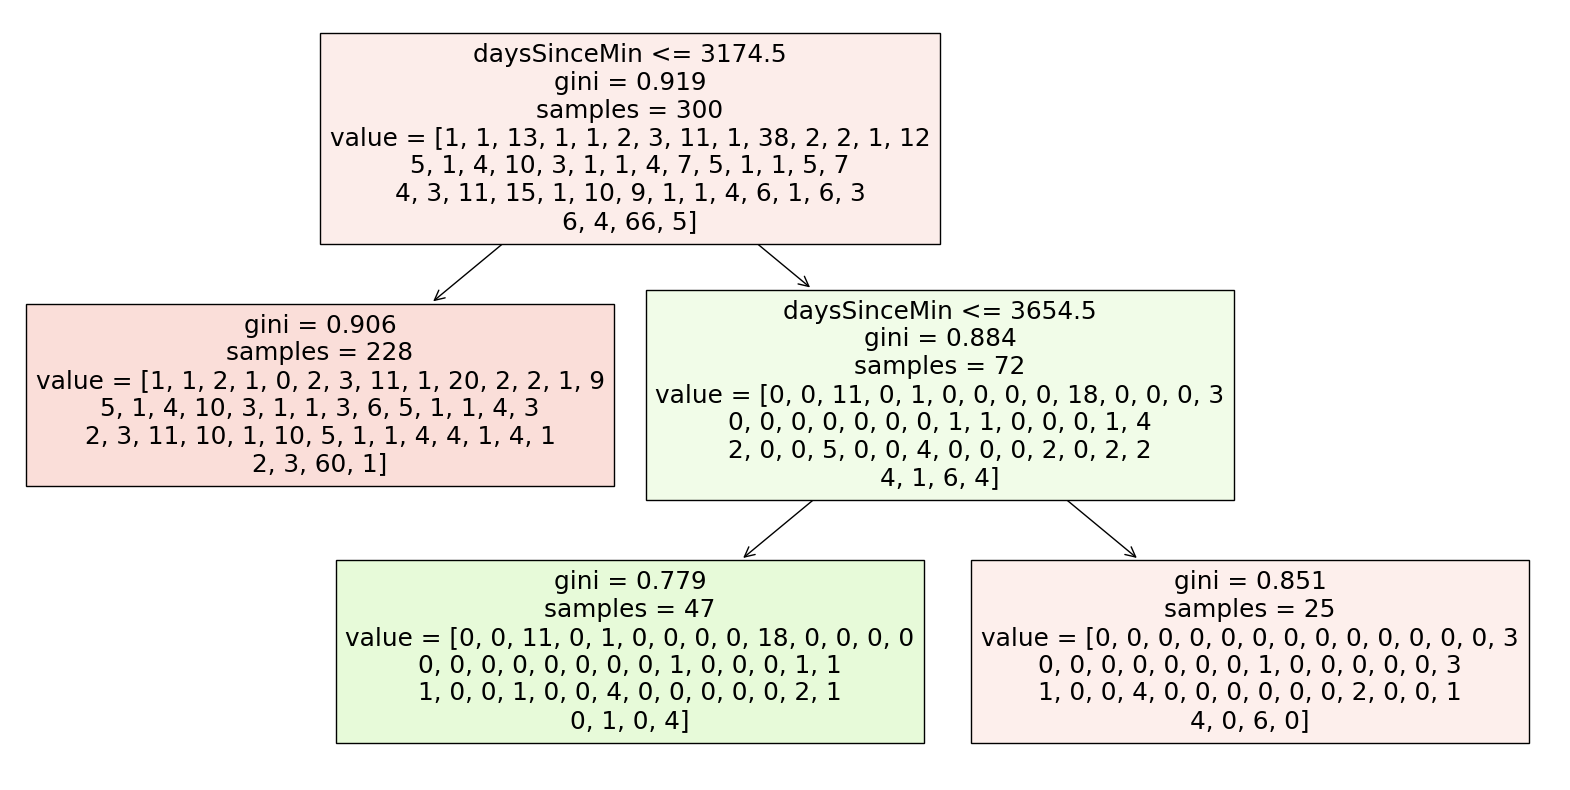

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20,10))
_ = plot_tree(clf, feature_names=clf.feature_names_in_, filled=True)

In [ ]:
clf.classes_

array(['  Algeria ', '  Argentina ', '  Australia ', '  Austria ',
       '  Belarus ', '  Bolivia ', '  Brazil ', '  Canada ', '  Chile ',
       '  China ', '  Colombia ', '  Denmark ', '  Finland ', '  France ',
       '  Germany ', '  Hong Kong ', '  Hungary ', '  India ',
       '  Indonesia ', '  Iran ', '  Israel ', '  Italy ', '  Japan ',
       '  Malaysia ', '  Mexico ', '  Mongolia ', '  Netherlands ',
       '  New Zealand ', '  Norway ', '  Peru ', '  Philippines ',
       '  Poland ', '  Portugal ', '  Republic of Korea ', '  Russia ',
       '  Singapore ', '  Slovenia ', '  Spain ', '  Sweden ',
       '  Switzerland ', '  Taiwan ', '  Turkey ', '  Ukraine ',
       '  United Kingdom ', '  United States ', '  Vietnam '],
      dtype=object)

Seemingly, the decision tree is only predicting United States and China, which is expected since those two are the most commonly occuring countries. And the decision tree is only creating decision boundaries perpendicular to the axis representing `daysSinceMin`.

As for the discussion about overfitting; I believe that the minimum value for the U-shaped test error curve will be quite high no matter how we split our testing and training data. I find that there is very little visible correlation between time, date, and country, meaning a decision tree is also relatively useless in the problem of classifying. Perhaps if I had access to information about which hardware (cube) was used to achieve each result, there would be an emerging pattern based on the popularity of certain products in certain countries, but that data is unfortunately not logged on the WCA database.

## Generating a Random Set of Times

Although our previously discussed methods of regression and classifying are ineffective with this dataset, one pattern which is almost certainly true is that the solve time data is normally distributed, or at least approximately normal. We unfortunately do not have access to the full WCA database with every single competitor's fastest single solve time, so we cannot calculate the mean and standard deviation. 

However, my idea is this: I will see how many total competitors have participated in the 3x3 Rubik's Cube event in the entire history of the WCA, then generate a random set of mock times following the Gaussian curve. I will play around with the mean and standard deviation parameters until I get data that vaguely matches our real data from the top 1000 results, then extrapolate to hopefully predict the real mean and standard deviation, or at least draw some conclusions about every top single 3x3 result.

First, I'll define a function which takes two inputs, `mean` and `std`, and uses them to generate a random set of 200000 values (I chose 200000 because that is the total number of competitors in the WCA 3x3 event, per their website). I'll make a dataframe from those randomly generated times, then filter out the results greater than 7.3 and less than 3.4 to more easily visualize the mock data side-by-side with the real data.

In [ ]:
import numpy as np
def random_times(mean, std):
    data_points = np.random.normal(mean, std, 200000)
    df = pd.DataFrame({'time': data_points, 'mock': 'Mock'})
    filtered_df = df[(df['time'] <= 7.4) & (df['time']>= 3.4)]
    return filtered_df
single_copy = singles.copy()

Since my goal is to create some Altair charts, I'd like to separate the mock data from the real data, hence the code below. Then I concatenate the mock data and the real data to get `resultdf`.

In [ ]:
single_copy['mock'] = 'Real'
resultdf = pd.concat([single_copy, random_times(15.1,3.05)], ignore_index=True)

I played around with a few values for `mean` and `std`, and landed on 15.1 and 3.05 respectively, which I found was similar enough to the real data.

Finally, to put the two histograms side-by-side to compare them:

In [ ]:
alt.Chart(resultdf).mark_bar(color='red').encode(
    alt.X('time', bin=alt.Bin(maxbins=20)),
    alt.Y('count(time)'),
    color='mock:N',
    column='mock:N'
)

alt.Chart(...)

The mock data looks quite similar to the real data, other than the fact that, among other things, there are less leftmost values for the real data. So, given the similarity in the histograms, I will conclude (without rigor) that the mean top single solve time for all competitors in the WCA is 15.1, with standard deviation 3.05. How does this compare to the actual data?

I decided to search on the WCA, and found that the median value was approximately 21.8. This is quite far off from our predicted value of 15.1! But this does not necessarily mean the worst; we can still conclude that the distribution of single solve times is not perfectly normal. The suggestion is that the distribution of solve times is actually right-skewed, which makes sense logically; there is a very high likelihood of there being outliers on the right extreme (solve times that are more than a minute long).

## Summary

First, I did a lot of cleaning data so that I could then visualize it, mainly using Altair. After doing some data visualization, I tried applying some of the regression and classifying tools that we learned in the latter weeks of class, but was unfortunately unsuccessful based on the fact that there was little visible correlation between the variables I was analyzing. But even though those trials were not fruitful, I used some random generation of normal data to conclude that the distribution of Rubik's cube solve times is right-skewed, which is consistent with the actual data provided by the WCA.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?
https://www.kaggle.com/datasets/patrasaurabh/evolution-of-rubiks-cube-solve-times

* List any other references that you found helpful.

https://www.kaggle.com/code/suharkov/evolution-of-rubik-s-cube-eda: This analysis of the same dataset that I was working with gave me a good headstart of what statistics to look at.

https://openscoring.io/blog/2020/03/08/sklearn_date_datetime_pmml/#:~:text=A%20datetime%20is%20a%20complex,be%20fed%20to%20Scikit-Learn: This is where I learned that I should preprocess the datetime data to work with `sklearn`.

https://altair-viz.github.io/altair-tutorial/notebooks/03-Binning-and-aggregation.html: This is where I learned to do binning in Altair.

https://www.worldcubeassociation.org/results/rankings/333/single: The WCA, which I referenced numerous times in the project. They provided all the data for this project.